In [ ]:
import pandas as pd
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("/content/twitter-suicidal_data.csv")

In [ ]:
df

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1
...,...,...
9114,have you ever laid on your bed at night and cr...,1
9115,the fault the blame the pain s still there i m...,1
9116,stop asking me to trust you when i m still cou...,1
9117,i never know how to handle sadness crying make...,1


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove non-alphabetic characters and remove punctuations
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in string.punctuation]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Perform stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a single string
    processed_text = ' '.join(words)

    return processed_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
text_to_preprocess = "my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge to run my car head first into the next person coming the opposite way when will i stop feeling jealous of tragic characters like gomer pile for the swift end they were able to bring to their lives"
processed_text = preprocess_text(text_to_preprocess)
print(processed_text)


life meaningless want end life badli life complet empti dont want creat mean creat mean pain long hold back urg run car head first next person come opposit way stop feel jealou tragic charact like gomer pile swift end abl bring live


In [ ]:
df['preprocessed_tweet'] = df['tweet'].apply(preprocess_text)

# Display the modified DataFrame with the preprocessed text
df

,tweet,intention,preprocessed_tweet
0,my life is meaningless i just want to end my l...,1,life meaningless want end life badli life comp...
1,muttering i wanna die to myself daily for a fe...,1,mutter wan na die daili month feel worthless s...
2,work slave i really feel like my only purpose ...,1,work slave realli feel like purpos life make h...
3,i did something on the 2 of october i overdose...,1,someth octob overdos felt alon horribl hospit ...
4,i feel like no one cares i just want to die ma...,1,feel like one care want die mayb feel less lone
...,...,...,...
9114,have you ever laid on your bed at night and cr...,1,ever laid bed night cri good enough count flaw...
9115,the fault the blame the pain s still there i m...,1,fault blame pain still alon insid broken home ...
9116,stop asking me to trust you when i m still cou...,1,stop ask trust still cough water last time let...
9117,i never know how to handle sadness crying make...,1,never know handl sad cri make feel stupid


In [ ]:
model = Word2Vec(sentences=df['preprocessed_tweet'], vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tweet'])

# Convert tokenized tweets to sequences of integers
x_train = tokenizer.texts_to_sequences(df['tweet'])


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from gensim.models import Word2Vec

# Tokenize the tweets
tokenized_tweets = [tweet.split() for tweet in df["preprocessed_tweet"]]
labels = to_categorical(df['intention'], num_classes=2)

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(tokenized_tweets, labels, test_size=0.33, random_state=42)

# Training Word2Vec model
word2vec_model = Word2Vec(sentences=x_train, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(x_train, total_examples=len(x_train), epochs=10)

# Assuming you have calculated the vocabulary size (unique words) beforehand


tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_tweets)

# Convert tokenized tweets to sequences of integers
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
maxlength=50
embedding_dim=100
# Create an embedding matrix to match the Embedding layer's expected weight shape
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word2vec_model.wv.key_to_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]



x_train = pad_sequences(x_train, maxlen=maxlength)
x_test = pad_sequences(x_test, maxlen=maxlength)



### 1-Layer LSTM - with 15 Epochs

In [ ]:
import tensorflow as tf
from keras.models import Sequential

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
                                                                            # batch 500 lstm 20  dim . sigmoid cate %
epochs = 15                                                                   #batch 500 lstm 400, dim 128 sigmoid cate   64%
emb_dim = 128
batch_size = 500         # higher, training will be faster
model_w = Sequential()
model_w.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlength, weights=[embedding_matrix], trainable=False))
model_w.add(SpatialDropout1D(0.7))
model_w.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))                     #64 as hidden layer # close 70% for each neural layer
model_w.add(Dense(2, activation='softmax'))
model_w.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy', metrics=['acc']) #reduce memory  loss = 'mean_squared_logarithmic_error'
print(model_w.summary())                                                                           #categorical_crossentropy
history_w = model_w.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           1791800   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 50, 100)           0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 200)               240800    
                                                                 
 dense_1 (Dense)             (None, 2)                 402       
                                                                 
Total params: 2033002 (7.76 MB)
Trainable params: 241202 (942.20 KB)
Non-trainable params: 1791800 (6.84 MB)
_________________________________________________________________
None
Epoch 1/15
11/11 [==============================] - 8s 195ms/step - loss

In [ ]:
loss, accuracy = model_w.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

95/95 [==============================] - 1s 15ms/step - loss: 0.3396 - acc: 0.8528
Test Accuracy: 85.28%


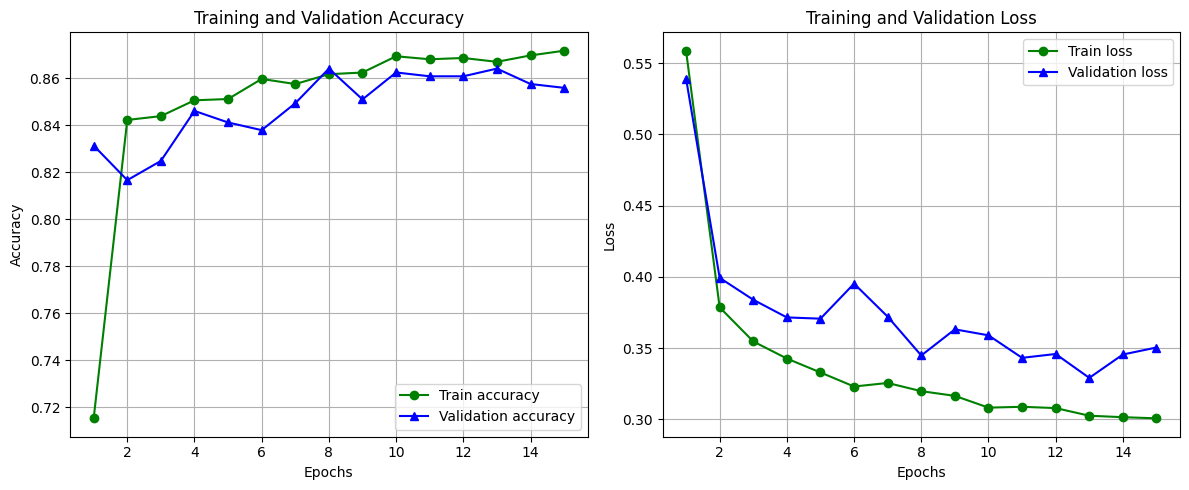

In [ ]:
import matplotlib.pyplot as plt

acc = history_w.history['acc']
val_acc = history_w.history['val_acc']
loss = history_w.history['loss']
val_loss = history_w.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'go-', label='Train accuracy')
plt.plot(epochs, val_acc, 'b^-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'go-', label='Train loss')
plt.plot(epochs, val_loss, 'b^-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 2-layer LSTM

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, PReLU, BatchNormalization
from keras.layers import Dense, Embedding, LSTM

epochs = 15
emb_dim = 32
batch_size = 200
model_y = Sequential()
model_y.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlength, weights=[embedding_matrix], trainable=False))
model_y.add(LSTM(50, dropout=0.3, recurrent_dropout=0.5, return_sequences=True))
model_y.add(LSTM(200, dropout=0.2, recurrent_dropout =0.5))
model_y.add(Dense(2, activation='softmax'))
model_y.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy', metrics=['acc'])
print(model_y.summary())                                                                           #categorical_crossentropy
history_y = model_y.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 100)           1791800   
                                                                 
 lstm_4 (LSTM)               (None, 50, 50)            30200     
                                                                 
 lstm_5 (LSTM)               (None, 200)               200800    
                                                                 
 dense_3 (Dense)             (None, 2)                 402       
                                                                 
Total params: 2023202 (7.72 MB)
Trainable params: 231402 (903.91 KB)
Non-trainable params: 1791800 (6.84 MB)
_________________________________________________________________
None
Epoch 1/15
25/25 [==============================] - 14s 288ms/step - loss: 0.4313 - acc: 0.8111 - val_loss: 0.3419 - val_acc: 0.8584
Epoch

In [ ]:
loss, accuracy = model_y.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

95/95 [==============================] - 3s 28ms/step - loss: 0.2398 - acc: 0.9020
Test Accuracy: 90.20%


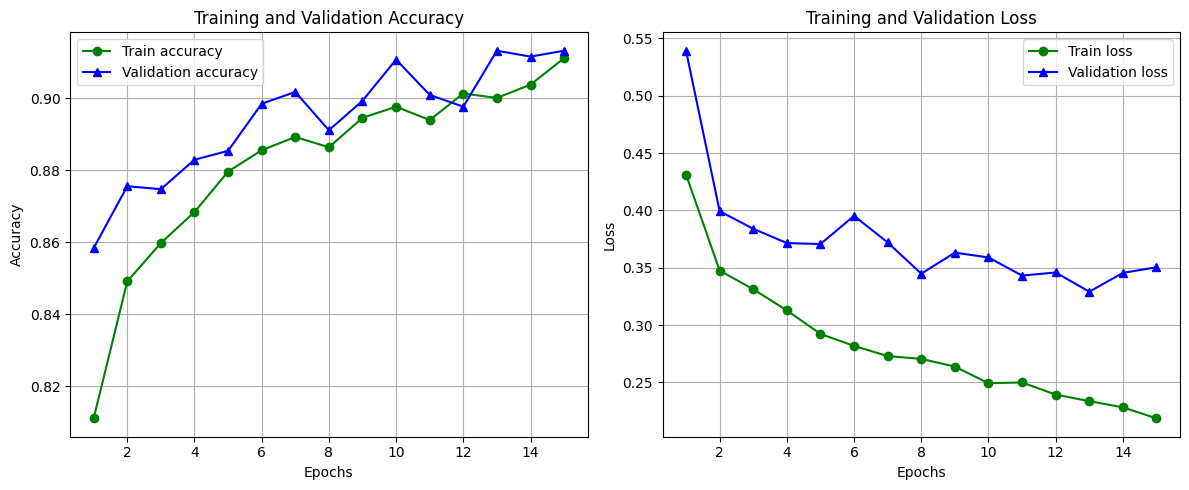

In [ ]:
import matplotlib.pyplot as plt

acc = history_y.history['acc']
val_acc = history_y.history['val_acc']
loss = history_y.history['loss']
val_loss = history_w.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'go-', label='Train accuracy')
plt.plot(epochs, val_acc, 'b^-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'go-', label='Train loss')
plt.plot(epochs, val_loss, 'b^-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### CNN + LSTM

In [ ]:
from keras.layers import Conv1D ,MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Activation

epochs = 15
emb_dim = 15
batch_size = 200
model_Z = Sequential()
model_Z.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlength, weights=[embedding_matrix], trainable=False))
model_Z.add(Conv1D(300, 6, padding='same'))
model_Z.add(Activation('relu'))
model_Z.add(MaxPooling1D(pool_size=2))
model_Z.add(Dropout(0.6))
model_Z.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model_Z.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model_Z.add(Dense(2, activation='softmax'))
model_Z.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy', metrics=['acc'])
print(model_Z.summary())                                                                           #categorical_crossentropy
historyZ = model_Z.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 50, 100)           1791800   
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 300)           180300    
                                                                 
 activation (Activation)     (None, 50, 300)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 25, 300)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 300)           0         
                                                                 
 lstm_6 (LSTM)               (None, 25, 100)           160400    
                                                      

In [ ]:
loss, accuracy = model_Z.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

95/95 [==============================] - 2s 16ms/step - loss: 0.2390 - acc: 0.9063
Test Accuracy: 90.63%


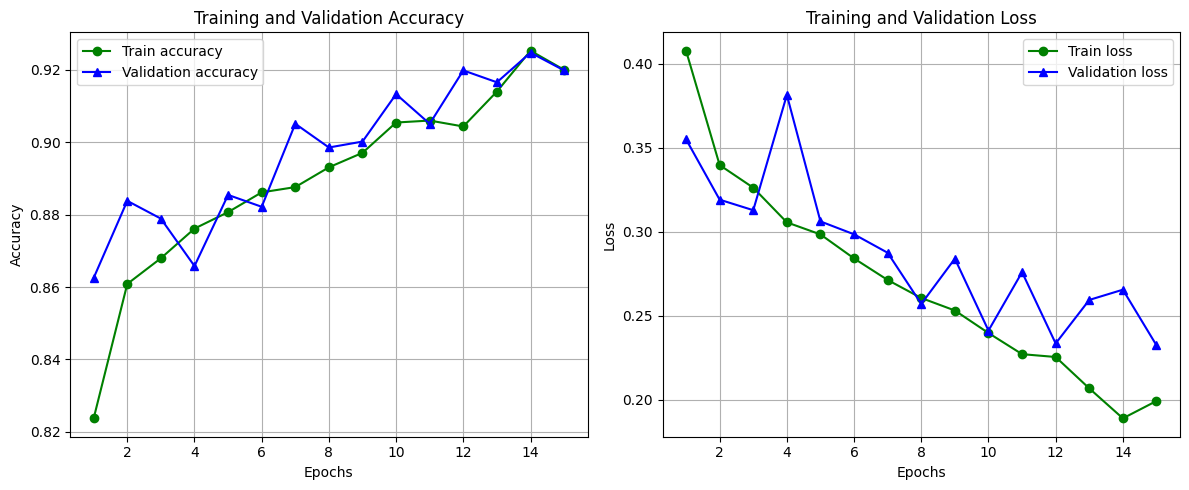

In [ ]:
import matplotlib.pyplot as plt

acc = historyZ.history['acc']
val_acc = historyZ.history['val_acc']
loss = historyZ.history['loss']
val_loss = historyZ.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'go-', label='Train accuracy')
plt.plot(epochs, val_acc, 'b^-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'go-', label='Train loss')
plt.plot(epochs, val_loss, 'b^-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
